<a href="https://colab.research.google.com/github/TejaswiniKashireddy/1234/blob/main/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Target: ['malignant' 'benign'] 

Missing values: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area e

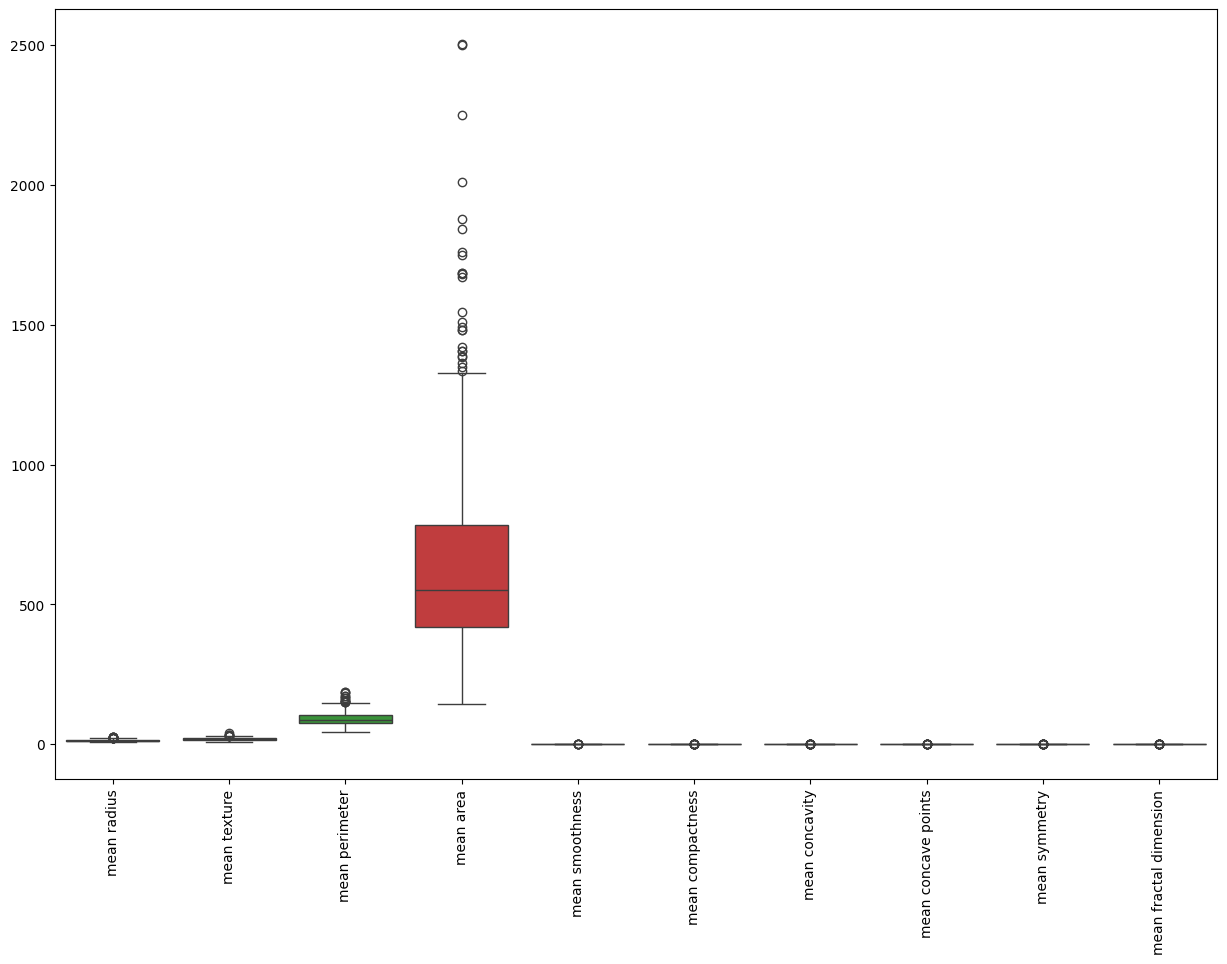

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[37  6]
 [ 0 71]]
--------------------------*--------------------------
Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score: 0.9494505494505494
Classification Report (GridSearch):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix (GridSearch):
[[39  4]
 [ 2 69]]


In [1]:
# 1.Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# 2.Load Breast Cancer Dataset
cancer = datasets.load_breast_cancer()

# Prepare dictionary format
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target

# Describe features and target
print("Features:\n", cancer.feature_names,"\n")
print("Target:", cancer.target_names,"\n")

# Check for missing values
print("Missing values:", data.isnull().sum())

# Exploratory analysis
plt.figure(figsize=(15, 10))
sns.boxplot(data.iloc[:, :10])
plt.xticks(rotation=90)
plt.show()

# 3.Split data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.Train SVM model
svm = SVC()
svm.fit(X_train, y_train)

# 5.Predict and analyze performance
y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("--------------------------*--------------------------")
# 6.Improve accuracy using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using best model
y_pred_grid = grid_search.predict(X_test)
print("Classification Report (GridSearch):")
print(classification_report(y_test, y_pred_grid))
print("Confusion Matrix (GridSearch):")
print(confusion_matrix(y_test, y_pred_grid))